<a href="https://colab.research.google.com/github/YugyeongJo/SeSAC_Python_Study/blob/main/docs/09_Python_Basic(Pandas)_0710.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python 기초

<목차>
1. 변수
2. 연산자
3. 제어문
4. 함수
5. 자료형 1
6. 자료형 2
7. 정규표현식
8. 판다스
9. 시각화
10. 파일 입출력

<hr>

# 9. 판다스 (Pandas)

- 데이터 분석과 조작을 위한 파이썬 라이브러리
- 구조화된 데이터를 쉽게 다루기 위해
- 데이터 구조 : 데이터프레임(DataFrame), 시리즈(Series)
- 데이터의 로드, 조작, 분석 및 시각화를 간편하게 수행 가능


## Series(시리즈)
  - 데이터가 순차적으로 나열된 1차원 배열의 형태(데이터와 인덱스(index)가 함께 저장)
  - 딕셔너리(dictionary)와 유사한 구조 : 키(key)와 값(value)
  - 각 데이터는 인덱스를 통해 접근.
  - 인덱스는 기본적으로 0부터 시작, 사용자가 원하는 값으로 설정할수도
  - 판다스 시리즈는 다양한 데이터 타입을 저장, 데이터 분석에서 많이 사용
  - 시리즈가 1차원 데이터 구조이기 때문에 데이터프레임의 각 행과 열은 본직적으로 인덱스와 값의 쌍으로 시리즈가 될 수 있음

```
  s = pd.Series(data, index=index, dtype=dtype, name=name, copy=none)

  주요 파라미터
  - data : 리스트, 튜플, 딕셔너리, 스칼라값 등
  - index : Series의 라벨 지정
  - dtype : 데이터 타입 지정 (기본값은 자동 추론)
  - name : Series의 이름 지정
  - copy : 입력 데이터의 복사본 생성 여부(기본값 False)

```
```
  Series.index
  Series.values
```
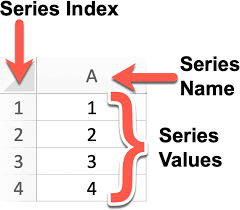

In [ ]:
# 리스트에 인덱스를 부여하여 시리즈를 만드는 예시
import pandas as pd

# 리스트 생성
data_list = [10, 20, 30]

# 리스트에 인덱스 부여하여 시리즈 생성
series = pd.Series(data_list, index=['idx1', 'idx2', 'idx3'])

print(series)

idx1    10
idx2    20
idx3    30
dtype: int64


In [ ]:
# 딕셔너리 타입으로 직접 인덱스를 부여하여 시리즈를 만드는 예시
import pandas as pd

# 딕셔너리 생성
data_dict = {
    'idx1': 10
    , 'idx2': 20
    , 'idx3': 30
}

# 딕셔너리를 사용하여 시리즈 생성
series = pd.Series(data_dict)

print(series)

idx1    10
idx2    20
idx3    30
dtype: int64


In [ ]:
# 리스트와 인덱스 모두 사용하여 시리즈를 만드는 예시
import pandas as pd

data = ['John', '1990-01-01', 'Engineer']
index = ['name', 'birth', 'job']

series = pd.Series(data, index=index)
print(series)

name           John
birth    1990-01-01
job        Engineer
dtype: object


### Series 원소의 선택
- list slicing과 동일하게 선택 가능
- 정수형 위치 인덱스는 각괄호[] 안에 위치를 나타내는 숫자를 입력
- 인덱스 이름(라벨)은 각 괄호 안에 이름과 함께 따옴표를 입력
```
Series[2:4] : 인덱스 2부터 인덱스 4 이전까지의 원소들을 슬라이싱
Series[[2, 6]] : 인덱스 2와 6에 해당하는 원소들
Series['a', 'b'] : 인덱스 이름이 'a'와 'b'인 원소들
```

In [ ]:
series[0:2]
series[[0, 2]]
series['name']

'John'

### 튜플 vs 리스트

|특성|튜플|리스트|
|--|--|--|
|불변성(Immutability)|내부 요소 변경 불가능|내부 요소 변경 가능|
|문법적 표기|괄호 ()와 쉼표 ,로 구분|대괄호 []와 쉼표 ,로 구분|
|메모리 사용|더 효율적 (변경 불가능)|많은 메모리 필요 (변경 가능)|
|속도|약간 더 빠를 수 있음|약간 느릴 수 있음|
|사용 사례|변경이 필요 없는 데이터|동적 데이터 관리 또는 수정이 필요한 데이터|

## 데이터프레임(DataFrame)
  - 2차원 배열, 여러 개의 Series의 집합
  - 열벡터(1차원 데이터프레임, 시리즈)
  - pd.DataFrame (dictionary_type_list)
  - pd.DataFrame (2차원 배열, index = 행 인덱스 배열, columns = 열 이름 배열)
  - DF.index = 새로운 행 인덱스 배열
  - DF.columns = 새로운 열 이름 배열

<img src='https://www.tutorialspoint.com/python_pandas/images/structure_table.jpg'/>

```
df = pd.DataFrame(data, index=index, columns=columns, dtype=dtype, copy=copy)

  주요 파라미터
  - data : 딕셔너리, 리스트, NumPy 배열, Series 등
  - index : 행 라벨 지정 (기본값은 RangeIndex)
  - columns : 열 라벨 지정
  - dtype : 데이터 타입 지정 (기본값은 자동 추론)
  - copy : 입력 데이터의 복사본 생성 여부(기본값 False)

```


In [ ]:
import pandas as pd

# 예시 데이터
data1 = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [23, 25, 24, 22],
    'Gender': ['Female', 'Male', 'Male', 'Male'],
    'Math': [90, 85, 78, 92],
    'English': [88, 79, 85, 90],
    'Science': [92, 80, 84, 88]
}

# 데이터 프레임 생성
df_students = pd.DataFrame(data1)

# 파일 생성
df_students.to_csv('students.csv', index=False)
df_students.to_json('students.json', orient='records', lines=True)
df_students.to_excel('students.xlsx', index=False)

### DataFrame 외부 파일 읽어오기

- csv 파일
  + csv 파일 : 콤마(,)로 값을 구분하여 저장된 텍스트 파일
  + head에 옵션을 지정하지 않으면 0행을 열로 지정
  + 구분자가 콤마가 아닌 경우, sep(delimiter)를 지정
  ```
  pd.read_csv('파일 경로 이름', header = None, index_col = False)
  ```

- Excel 파일
  + 실행환경에 따라 별도의 라이브러리가 필요할 수도 있음
  ```
  pd.read_excel('파일 경로 이름', header = None, index_col = False)
  ```

- JSON 파일
  + 데이터 공유를 목적으로 개발된 특수 파일, key:value의 딕셔너리 구조
  + 각 라인이 별도의 json객체인 경우 lines = True 옵션을 사용
  ```
  pd.read_json('파일 경로', lines=True)
  ```

|파일 형식|설명|읽기 명령어|쓰기 명령어|
|--|--|--|--|
|CSV|쉼표로 구분된 텍스트 파일|`pd.read_csv()`|`pd.to_csv()`|
|Excel|Microsoft Excel 파일|`pd.read_excel()`|`pd.to_excel()`|
|JSON|구조화된 데이터를 표현하는 형식|`pd.read_json()`|`pd.to_json()`|
|HDF5|대용량 데이터 저장 및 관리|`pd.read_hdf()`|`pd.to_hdf()`|
|SQL|DB와 연결하여 데이터 읽기/쓰기|`pd.read_sql()`|`pd.to_sql()`|
|Parquet|Apache Parquet 파일 형식|`pd.read_parquet()`|`pd.to_parquet()`|
|Feather|DF을 메모리에 저장하고 읽기/쓰기|`pd.read_feather()`|`pd.to_feather()`|
|HTML|HTML 테이블 데이터를 읽기|`pd.read_html()`|N/A|



In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt

# 파일 경로 지정
train_file_path = '/content/drive/MyDrive/SeSAC 데이터 AI개발 과정/dataset/train.csv'

# pandas를 사용하여 CSV 파일 불러오기
df_titanic_train = pd.read_csv(train_file_path)

# dataframe
df_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 시리즈를 연결하여 데이터프레임을 만드는 예시(concat())
import pandas as pd

# 시리즈 생성
series1 =

### DataFrame 생성하기

- 시리즈 연결 `concat()`
- 시리즈 연결 `DataFrame()`
- 리스트 데이터로 생성
- 엑셀파일로 생성
- csv 파일로 생성
- json 파일로 생성
- 기타 조건 명령어로 생성

#### index, column 명 지정
- df.index = [새 인덱스]
- df.coulumns = [새 이름]


In [ ]:
# 시리즈를 연결하여 데이터프레임을 만드는 예시(concat())
import pandas as pd

# 시리즈 생성
series1 = pd.Series([10, 20, 30], name='Series1')
series2 = pd.Series([10, 20, 30], name='Series2')

# 시리즈를 데이터프레임으로 변환
df_series1 = series1.to_frame()
df_series2 = series2.to_frame()

# 데이터프레임을 병합
merged_df = pd.concat([df_series1, df_series2], axis=1)

merged_df

,Series1,Series2
0,10,10
1,20,20
2,30,30


In [ ]:
# 시리즈를 연결하여 데이터프레임을 만드는 예시(DataFrame())
import pandas as pd

# 시리즈 생성
series1 = pd.Series([10, 20, 30], name='Series1')
series2 = pd.Series([40, 50, 60], name='Series2')

# 시리즈를 데이터프레임으로 변환
df = pd.DataFrame()

# 시리즈를 데이터프레임에 병합
df['Series1'] = series1
df['Series2'] = series2

df

,Series1,Series2
0,10,40
1,20,50
2,30,60


In [ ]:
# 리스트 데이터로 데이터프레임을 만드는 예시
import pandas as pd

# 리스트 데이터 생성
data = [
    [1, 'Alice', 24],
    [2, 'Bob', 27],
    [3, 'Charlie', 22]
]

# 컬럼 이름 지정
columns = ['ID', 'Name', 'Age']

# 데이터프레임 생성
df = pd.DataFrame(data, columns=columns)

# 데이터프레임 출력
df


,ID,Name,Age
0,1,Alice,24
1,2,Bob,27
2,3,Charlie,22


In [ ]:
# 엑셀파일로 데이터프레임 만드는 예시
import pandas as pd

# 엑셀 파일 경로 지정
excel_file_path = "/content/students.xlsx"

# 엑셀 파일로부터 데이터프레임 생성
df_excel = pd.read_excel(excel_file_path)

# 생성된 데이터프레임 출력
df_excel

FileNotFoundError: [Errno 2] No such file or directory: '/content/students.xlsx'

In [ ]:
# csv파일로 데이터프레임 만드는 예시
import pandas as pd

# 엑셀 파일 경로 지정
csv_file_path = "/content/students.csv"

# 엑셀 파일로부터 데이터프레임 생성
df_csv = pd.read_csv(csv_file_path)

# 생성된 데이터프레임 출력
df_csv

FileNotFoundError: [Errno 2] No such file or directory: '/content/students.csv'

In [ ]:
# json파일로 데이터프레임 만드는 예시
import pandas as pd

# 엑셀 파일 경로 지정
json_file_path = "/content/students.json"

# 엑셀 파일로부터 데이터프레임 생성
df_json = pd.read_json(json_file_path, orient='records', lines=True)

# 생성된 데이터프레임 출력
df_json

In [ ]:
# 기타 조건 명령어로 데이터프레임을 만드는 예시
import pandas as pd

data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eva"],
    "Age": [23, 35, 45, 25, 30],
    "Score": [88, 92, 85, 90, 95]
}

df = pd.DataFrame(data)

# 열 선택
name_column = df["Name"]

# 행 선택
row = df.loc[0]

# 조건으로 필터링
filtered_df = df[df["Age"] > 25]

# 그룹화 및 집계
grouped_df = df.groupby("Age").mean(numeric_only=True)

# 정렬
sorted_df = df.sort_values(by="Age")

print("name_column:")
print(name_column)
print("\nrow:")
print(row)
print("\nfiltered_df:")
print(filtered_df)
print("\ngrouped_df:")
print(grouped_df)
print("\nsorted_df:")
print(sorted_df)

name_column:
0      Alice
1        Bob
2    Charlie
3      David
4        Eva
Name: Name, dtype: object

row:
Name     Alice
Age         23
Score       88
Name: 0, dtype: object

filtered_df:
      Name  Age  Score
1      Bob   35     92
2  Charlie   45     85
4      Eva   30     95

grouped_df:
     Score
Age       
23    88.0
25    90.0
30    95.0
35    92.0
45    85.0

sorted_df:
      Name  Age  Score
0    Alice   23     88
3    David   25     90
4      Eva   30     95
1      Bob   35     92
2  Charlie   45     85


### DataFrame 병합하기

- concat() 함수를 사용
  + 기본이 세로(위+아래)로 연결
  + 가로연결 : axis = 1
  + join() : 인덱스를 기준으로 데이터프레임을 결합
    ```
    DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)

    other : 병합할 다른 데이터프레임
    on : 인덱스가 아닌 컬럼을 기준으로 병합할 경우 사용
    how : 병합 방식 ('left' 왼쪽 df의 모든 행을 유지, 'right' 오른쪽 df의 모든 행을 유지, 'outer' 모든 행을 유지, 'inner' 공통으로 존재하는 행만 유지)
    lsuffix, rsuffix: 병합할 때 컬럼 이름이 중복될 경우 접두사
    sort : 병합 후 정렬 여부
    ```
  + merge() : 컬럼을 기준으로 병합하는데 유용
    ```
    pandas.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False)

    left : 왼쪽 데이터프레임
    right : 오른쪽 데이터프레임
    how : 병합 방식('left', 'right', 'outer', 'inner')
    on : 병합 기준이 되는 컬럼 이름
    left_on, right_on : 병합 기준이 되는 왼쪽 및 오른쪽 데이터프레임의 컬럼 이름
    left_index, right_index : 인덱스를 기준으로 병합할지 여부
    sort : 병합 후 정렬 여부
    ```

In [ ]:
import pandas as pd

# 두 개의 데이터프레임 생성
df1 = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df2 = pd.DataFrame({'A': [7, 8, 9], 'B': [10, 11, 12]})

# 데이터프레임 병합 (세로로 결합)
combined_df = pd.concat([df1, df2], ignore_index=True)

combined_df

,A,B
0,1,4
1,2,5
2,3,6
3,7,10
4,8,11
5,9,12


In [ ]:
import pandas as pd

# 두 개의 데이터프레임 생성
df1 = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df2 = pd.DataFrame({'A': [7, 8, 9], 'B': [10, 11, 12]})

# 데이터프레임 병합 (가로로 결합)
combined_df = pd.concat([df1, df2], axis=1)

combined_df

,A,B,A,B
0,1,4,7,10
1,2,5,8,11
2,3,6,9,12


In [ ]:
# join(), outer(모든 행을 유지)
df1 = pd.DataFrame({'A' : ['A0', 'A1', 'A2'],
                    'B' : ['B0', 'B1', 'B2']},
                   index=['KO', 'K1', 'K2'])
df2 = pd.DataFrame({'C' : ['C0', 'C1', 'C2'],
                    'D' : ['D0', 'D1', 'D2']},
                   index=['KO', 'K2', 'K3'])

result = df1.join(df2, how='outer')
result

,A,B,C,D
K1,A1,B1,NaN,NaN
K2,A2,B2,C1,D1
K3,NaN,NaN,C2,D2
KO,A0,B0,C0,D0


In [ ]:
import pandas as pd

# 예제 df 생성
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 4, 5],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [24, 27, 22, 32, 29],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
}, index=['a', 'b', 'c', 'd', 'e'])

df2 = pd.DataFrame({
    'ID': [3, 4, 5, 6, 7],
    'Name': ['Charlie', 'David', 'Eva', 'Frank', 'Grace'],
    'Age': [22, 32, 29, 25, 28],
    'Country': ['USA', 'USA', 'USA', 'Canada', 'Canada']
}, index=['c', 'd', 'e', 'f', 'g'])

# join() 사용
result = df1.join(df2, how='outer', lsuffix='_df1', rsuffix='_df2')
result


,ID_df1,Name_df1,Age_df1,City,ID_df2,Name_df2,Age_df2,Country
a,1.0,Alice,24.0,New York,NaN,NaN,NaN,NaN
b,2.0,Bob,27.0,Los Angeles,NaN,NaN,NaN,NaN
c,3.0,Charlie,22.0,Chicago,3.0,Charlie,22.0,USA
d,4.0,David,32.0,Houston,4.0,David,32.0,USA
e,5.0,Eva,29.0,Phoenix,5.0,Eva,29.0,USA
f,NaN,NaN,NaN,NaN,6.0,Frank,25.0,Canada
g,NaN,NaN,NaN,NaN,7.0,Grace,28.0,Canada


In [ ]:
# merge(), inner & key (키 값이 일치하는 행만!)
import pandas as pd

df1 = pd.DataFrame({'key': ['KO', 'K1', 'K2', 'K3'],
                    'A' : ['A0', 'A1', 'A2', 'A3'],
                    'B' : ['B0', 'B1', 'B2', 'B3']})
df2 = pd.DataFrame({'key': ['KO', 'K1', 'K2', 'K4'],
                    'C' : ['C0', 'C1', 'C2','C3'],
                    'D' : ['D0', 'D1', 'D2', 'D3']})

# merge() 사용
result = pd.merge(df1, df2, on='key', how='inner')
result

,key,A,B,C,D
0,KO,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


In [ ]:
import pandas as pd

# 예제 df 생성
df1 = pd.DataFrame({
    'ID_df1': [1, 2, 3, 4, 5],
    'Name_df1': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age_df1': [24, 27, 22, 32, 29],
    'City_df1': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
}, index=['a', 'b', 'c', 'd', 'e'])

df2 = pd.DataFrame({
    'ID_df2': [3, 4, 5, 6, 7],
    'Name_df2': ['Charlie', 'David', 'Eva', 'Frank', 'Grace'],
    'Age_df2': [22, 32, 29, 25, 28],
    'Country': ['USA', 'USA', 'USA', 'Canada', 'Canada']
}, index=['c', 'd', 'e', 'f', 'g'])

# merge
result = pd.merge(df1, df2, left_index=True, right_index=True, how='outer')
result


,ID_df1,Name_df1,Age_df1,City_df1,ID_df2,Name_df2,Age_df2,Country
a,1.0,Alice,24.0,New York,NaN,NaN,NaN,NaN
b,2.0,Bob,27.0,Los Angeles,NaN,NaN,NaN,NaN
c,3.0,Charlie,22.0,Chicago,3.0,Charlie,22.0,USA
d,4.0,David,32.0,Houston,4.0,David,32.0,USA
e,5.0,Eva,29.0,Phoenix,5.0,Eva,29.0,USA
f,NaN,NaN,NaN,NaN,6.0,Frank,25.0,Canada
g,NaN,NaN,NaN,NaN,7.0,Grace,28.0,Canada


### DataFrame 삭제하기

- drop(), axis=0, 1 사용
  + 행/열 부분 삭제

```
df.drop(행 인덱스 또는 배열, axis = 0)
df.drop(열 이름 또는 배열, axis = 1)
```

In [ ]:
import pandas as pd

# 데이터프레임 생성
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df = pd.DataFrame(data)

df

,A,B
0,1,4
1,2,5
2,3,6


In [ ]:
# 열 삭제
df_removed_col = df.drop('B', axis=1)

df_removed_col

,A
0,1
1,2
2,3


In [ ]:
# 행 삭제
df_removed_row = df.drop(1, axis=0)

df_removed_row

,A,B
0,1,4
2,3,6


In [ ]:
# 시리즈 생성
series1 = pd.Series([10, 20, 30], name='Series1')
series2 = pd.Series([40, 50, 60], name='Series2')

# 시리즈를 데이터프레임으로 변환
df = pd.concat([series1, series2], axis=1)
df

# 인덱스 이름 변경
df.index = ['row1', 'row2', 'row3']
df

# 컬럼 이름 변경
df.columns = ['Column1', 'Column2']
df

# row2 행 삭제
df = df.drop('row2')
df

# Column1 열 삭제
df = df.drop('Column1', axis=1)
df

,Column2
row1,40
row3,60


### DataFrame 행 데이터 선택

- iloc(integer position based)
  + 정수 위치 인덱스를 사용하여 행 데이터를 지정
  + 0부터 시작하는 정수 인덱스로 마지막을 불포함

- loc(label based location)
  + 인덱스 이름(라벨)을 기준으로 행 데이터를 지정
  + 라벨을 기반으로 시작하여 끝부분을 포함

```
df.iloc[]
df.loc[]
```

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'ID': [1, 2, 3, 4, 5],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [24, 27, 22, 32, 29],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
}, index=['a', 'b', 'c', 'd', 'e'])

df

,ID,Name,Age,City
a,1,Alice,24,New York
b,2,Bob,27,Los Angeles
c,3,Charlie,22,Chicago
d,4,David,32,Houston
e,5,Eva,29,Phoenix


In [ ]:
# loc(label based location) : 인덱스 이름(라벨:abcde)을 기준으로 행 데이터를 지정
print(df.loc['b'])
print(df.loc['b':'d', ['Name', 'Age']])
print(df.loc[df['Age'] > 30])

ID                2
Name            Bob
Age              27
City    Los Angeles
Name: b, dtype: object
      Name  Age
b      Bob   27
c  Charlie   22
d    David   32
   ID   Name  Age     City
d   4  David   32  Houston


In [ ]:
# iloc(integer position based) : 정수 위치 인덱스(0~4)를 사용하여 행 데이터를 지정
print(df.iloc[1])
print(df.iloc[1:3, [0, 2]])
print(df.iloc[:3, :])

ID                2
Name            Bob
Age              27
City    Los Angeles
Name: b, dtype: object
   ID  Age
b   2   27
c   3   22
   ID     Name  Age         City
a   1    Alice   24     New York
b   2      Bob   27  Los Angeles
c   3  Charlie   22      Chicago


In [ ]:
# DataFrame의 다양한 행 데이터 조회 방법
import pandas as pd

df = pd.DataFrame({
    'ID': [1, 2, 3, 4, 5],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [24, 27, 22, 32, 29],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
})

# 인덱스 라벨로 선택 (loc)
print(df.loc[2])
print(df.loc[1:3])
print("=========")

# 정수 위치로 선택 (iloc)
print(df.iloc[0])
print(df.iloc[1:4])
print("=========")

# 불리언 인덱싱
print(df[df['Age'] > 30])
print(df.loc[df['City']=='New York'])
print("=========")

# 여러 조건을 조합한 선택
print(df[(df['Age'] > 25) & (df['City'] != 'Los Angeles')])
print("=========")

# 특정 값을 포함하는 행 선택
print(df[df['Name'].isin(['Alice', 'Eva'])])
print("=========")

# 행 번호로 선택
print(df.head(2))
print(df.tail(2))
print("=========")

# 샘플링
print(df.sample(n=2))
print("=========")

ID            3
Name    Charlie
Age          22
City    Chicago
Name: 2, dtype: object
   ID     Name  Age         City
1   2      Bob   27  Los Angeles
2   3  Charlie   22      Chicago
3   4    David   32      Houston
ID             1
Name       Alice
Age           24
City    New York
Name: 0, dtype: object
   ID     Name  Age         City
1   2      Bob   27  Los Angeles
2   3  Charlie   22      Chicago
3   4    David   32      Houston
   ID   Name  Age     City
3   4  David   32  Houston
   ID   Name  Age      City
0   1  Alice   24  New York
   ID   Name  Age     City
3   4  David   32  Houston
4   5    Eva   29  Phoenix
   ID   Name  Age      City
0   1  Alice   24  New York
4   5    Eva   29   Phoenix
   ID   Name  Age         City
0   1  Alice   24     New York
1   2    Bob   27  Los Angeles
   ID   Name  Age     City
3   4  David   32  Houston
4   5    Eva   29  Phoenix
   ID   Name  Age         City
1   2    Bob   27  Los Angeles
3   4  David   32      Houston


### DataFrame 열 데이터 선택

- 단일 열 선택
  + 대괄호 표기법 : `df['column_name']`
  + 점(.) 표기법 (공백이 없는 열 이름에만 사용 가능) : `df.column_name`

- 여러 열 선택
  + 리스트를 사용한 대괄호 표기법 : `df[['column1', 'column2', 'column3']]`
  + 조건을 이용한 열 선택 : `df.loc[:, df.columns.str.contains('pattern')]`
  + 인덱스 기반 선택 (iloc) : `df.iloc[]`

- 라벨 기반 선택 (loc)
  + `df.loc[:, 'column_name']`
  + `df.loc[:, ['column1', 'column2']]`

- 이름 함수를 이용한 선택
  + `df.filter(items=['column1', 'column2])`

- 불리언 인덱싱
  + `mask = [True, False, True, False, ...]`
  + `DataFrame의 열 수 만큼 df.loc[:, mask]`

In [ ]:
import pandas as pd

# 샘플 df 생성
df = pd.DataFrame({
    'A':[1, 2, 3]
    , 'B':[4, 5, 6]
    , 'C':[7, 8, 9]
    , 'D':[10, 11, 12]
})

# 단일 열 선택
print(df['A'])
print('-----------------')
print(df.B)
print('-----------------')

# 여러 열 선택
print(df[['A', 'C']])
print('-----------------')

# 조건을 이용한 열 선택
print(df.loc[:, df.columns[df.columns.str.contains('A|B')]])
print('-----------------')

# iloc를 이용한 선택
print(df.iloc[:, [0,2]])
print('-----------------')

# loc를 이용한 선택
print(df.loc[:, ['A','D']])
print('-----------------')

# 데이터 타입 기반 선택
print(df.select_dtypes(include=['int64']))

0    1
1    2
2    3
Name: A, dtype: int64
-----------------
0    4
1    5
2    6
Name: B, dtype: int64
-----------------
   A  C
0  1  7
1  2  8
2  3  9
-----------------
   A  B
0  1  4
1  2  5
2  3  6
-----------------
   A  C
0  1  7
1  2  8
2  3  9
-----------------
   A   D
0  1  10
1  2  11
2  3  12
-----------------
   A  B  C   D
0  1  4  7  10
1  2  5  8  11
2  3  6  9  12


### DataFrame 원소 선택

- [행, 열] 형식의 2차원 좌표로 원소를 지정
- 행과 열 모두 1개 이상 선택하여 series나 df 반환 가능

```
index이름 : df.loc[행 인덱스, 열 이름]
정수 위치 index : df.iloc[행 번호, 열 번호]
```

- df.set_index('이름', inplace = True) : '이름'열을 새로운 인덱스 지정

```
DataFrame.set_index(keys, drop=True, append=False, inplace=False)
  - keys : 인덱스로 설정할 열 이름 또는 열 이름의 리스트
  - drop : 기존 열을 제거할지. 기본값은 True
  - append : 기존 인덱스에 새 인덱스를 추가할지 여부. 기본값을 False
  - inplace : 데이터프레임을 직접 수정할지 여부를 지정. 기본값은 False
```

In [ ]:
import pandas as pd

# 데이터프레임 생성
data = {
    'A': [1, 2, 3]
    , 'B' : [4, 5, 6]
}
df = pd.DataFrame(data)

df

,A,B
0,1,4
1,2,5
2,3,6


In [ ]:
# 특정 셀 수정
df.at[0, 'A'] = 10

df

,A,B
0,10,4
1,2,5
2,3,6


In [ ]:
# 열 이름 변경
df.rename(columns={'A':'X', 'B':'Y'}, inplace=True)

df

,X,Y
0,10,4
1,2,5
2,3,6


In [ ]:
# df.set_index()

import pandas as pd

# 샘플 데이터프레임 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David']
    , 'Age': [24, 27, 22, 32]
    , 'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']
}

df = pd.DataFrame(data)

df.set_index('Name', inplace=True)
df

,Age,City
Name,,
Alice,24,New York
Bob,27,Los Angeles
Charlie,22,Chicago
David,32,Houston


### DataFrame 행과 열 슬라이싱

- loc을 사용하여 슬라이싱
- iloc을 사용하여 슬라이상

```
df.loc[행이름:행이름, 열이름:열이름]
df.iloc[행번호:행번호, 열번호:열번호]
```

In [ ]:
import pandas as pd

# 샘플 데이터프레임 생성
data = {
    'A': [1, 2, 3]
    , 'B': [4, 5, 6]
    , 'C': [7, 8, 9]
}

df = pd.DataFrame(data, index=['row1', 'row2', 'row3'])

# loc을 사용하여 특정 행과 열 선택
print(df.loc['row1', 'A'])

# iloc을 사용하여 특정 행과 열 선택
print(df.iloc[0, 1])

# loc을 사용하여 슬라이싱
print(df.loc['row1':'row2', 'A':'B'])

# iloc을 사용하여 슬라이싱
print(df.iloc[0:2, 0:2])

1
4
      A  B
row1  1  4
row2  2  5
      A  B
row1  1  4
row2  2  5


### DataFrame 행과 열 추가 및 원소 변경

- 행 추가
  ```
  df.loc['추가 행 이름'] = 데이터 값 또는 배열
  ```

- 열 추가
  ```
  df['추가하려는 열'] = 데이터 값
  ```

- 원소값 변경
  ```
  df의 객체 일부 또는 원소 선택 = 새로운 값
  ```
  

In [ ]:
import pandas as pd

# 예제 DataFrame 생성
data = {
    'ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [24, 27, 22, 32],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']
}

df = pd.DataFrame(data)

# 열추가
df['Country'] = ['USA', 'USA', 'USA', 'USA']

# 행추가
df.loc[len(df)] = [5, 'Eva', 29, 'Phoenix', 'USA']

# 원소 변경
df.loc[df['Name'] == 'Alice', 'Age'] = 25

# concat을 사용하여 행추가
new_row = {'ID': 5, 'Name': 'Eva', 'Age': 29, 'City': 'Phoenix', 'Country': 'USA'}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
df

,ID,Name,Age,City,Country
0,1,Alice,25,New York,USA
1,2,Bob,27,Los Angeles,USA
2,3,Charlie,22,Chicago,USA
3,4,David,32,Houston,USA
4,5,Eva,29,Phoenix,USA
5,5,Eva,29,Phoenix,USA


### DataFrame 행, 열에 관한 다양한 기능

- 행, 열의 위치 바꾸기 `df.transpost()`, `df.T`
- 행 인덱스 재배열 `df.reindex(새로운 인덱스 배열, fill_value=0)`
  + df에 존재하지 않는 행 인덱스가 추가되는 경우 데이터 미지정시 nan으로 입력
- 행 인덱스 초기화 `df.reset_index()`
  + 행 인덱스를 정수형 인덱스로 초기화
- 행 인덱스를 기준으로 데이터프레임 정렬 `df.sort_index(['열이름'] 또는 '열 이름', ascending = True)`
  + 행 인덱스를 기준으로 데이터프레임의 값을 정렬
- 특정 열의 데이터 값을 기준으로 데이터프레임 정렬 `df.sort_values(by='열이름', ascending=True)`
- 데이터 그룹화 `groupby()`
  + 각 그룹에 대해 다양한 연산을 수행
  + 그룹화 기준이 되는 열의 이름을 사용해서 수행
  + 그룹화된 객체에 대해 집계 함수(sum(), mean(), count() 등) 호출
  + `agg()` 를 함께 사용하여 여러 집계 연산을 동시에 수행

In [ ]:
import pandas as pd

# 샘플 데이터프레임 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie']
    , 'Age': [24, 27, 22]
    , 'City': ['New York', 'Los Angeles', 'Chicago']
}

df = pd.DataFrame(data)

# transpose()
df_transposed = df.transpose()
df_transposed

# reindex()
new_index = [2, 0, 1]
df_reindexed = df.reindex(new_index)
df_reindexed

new_columns = ['City', 'Name', 'Age']
df_reindexed_columns = df.reindex(columns=new_columns)
df_reindexed_columns

# reset_index()
df_reset = df.reset_index()
df_reset

# sort_index()
df.set_index('Name', inplace=True)
df_sorted_index = df.sort_index()
df_sorted_index

# sort_values()
df_sorted_values = df.sort_values(by='Name')
df_sorted_values

,Age,City
Name,,
Alice,24,New York
Bob,27,Los Angeles
Charlie,22,Chicago


In [ ]:
import pandas as pd

# 샘플 데이터프레임 생성
data = {
    'Category': ['A', 'A', 'B', 'B', 'C', 'C']
    , 'Values':[10, 20, 30, 40, 50, 60]
}

df = pd.DataFrame(data)

# groupby()
grouped = df.groupby('Category').sum()
grouped

,Values
Category,
A,30
B,70
C,110


In [ ]:
import pandas as pd

# 샘플 데이터프레임 생성
data = {
    'Category1': ['A', 'A', 'B', 'B', 'C', 'C']
    , 'Category2': ['X', 'Y', 'X', 'Y', 'X', 'Y']
    , 'Values':[10, 20, 30, 40, 50, 60]
}

df = pd.DataFrame(data)

grouped = df.groupby(['Category1', 'Category2']).sum()
grouped

Values
Category1 Category2        
A         X              10
          Y              20
B         X              30
          Y              40
C         X              50
          Y              60

In [ ]:
import pandas as pd

# 샘플 데이터프레임 생성
data = {
    'Category': ['A', 'A', 'B', 'B', 'C', 'C']
    , 'Values':[10, 20, 30, 40, 50, 60]
}

df = pd.DataFrame(data)

grouped = df.groupby('Category').agg(['sum', 'mean'])
grouped

Values      
            sum  mean
Category             
A            30  15.0
B            70  35.0
C           110  55.0

In [ ]:
import pandas as pd

# 샘플 데이터프레임 생성
data = {
    'Category': ['A', 'A', 'B', 'B', 'C', 'C']
    , 'Values':[10, 20, 30, 40, 50, 60]
}

df = pd.DataFrame(data)

# 사용자 정의 함수 : 그룹의 최대값과 최소값의 차이 계산
def range_func(x):
  return x.max() - x.min()

grouped = df.groupby('Category').apply(lambda x: range_func(x['Values']))
grouped

filtered = df.groupby('Category').filter(lambda x: x['Values'].sum() >= 50)
filtered

,Category,Values
2,B,30
3,B,40
4,C,50
5,C,60


### DataFrame 결측치 처리

- 결측치 삭제 `dropna()`
  + 결측값(NaN)을 제거하는데 사용
  ```
  DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
  axis : 결측값을 기준으로 제거할 축을 지정. 0은 행을, 1은 열을 의미. 기본값은 0
  how : 'any' 또는 'all'(any는 하나라도 NaN이 있으면 해당 행 또는 열을 제거, all은 모든 값이 NaN일 때만 제거. 기본값음 any)
  thresh : 이 값보다 많은 비결측값이 있는 행 또는 열만 남김
  subset : 특정 행이나 열에서만 결측값을 찾아 제거
  inplace : True로 설정하면 원본 데이터프레임을 수정
  ```
- 결측값 채우기 `fillna()`
  + 결측값(NaN)을 지정한 값으로 대체하는데 사용
  ```
  DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None)
  value : 결측값을 대체할 값, 딕셔너리, 시리즈 , 스칼라 값 등을 사용
  method : 'ffill'(앞의 값으로 채우기) 또는 'bfill'(뒤의 값으로 채우기)
  axis : 결측값을 채울 축, 0 또는 'index'는 행을 따라, 1 또는 'columns'는 열을 따라
  inplace : 원본 데이터프레임을 변경할지 여부
  limit : 결측값을 채울 최대 개수
  ```

In [ ]:
import pandas as pd
import numpy as np

# 예제 데이터프레임 생성
df = pd.DataFrame({
    'A' : [1, 2, np.nan, 4]
    , 'B' : [np.nan, 2, 3, 4]
    , 'C' : [1, 2, 3, np.nan]
})

# 결측값이 있는 행 제거
df_dropped = df.dropna()
print("결측값이 있는 행 제거 : \n")
df_dropped

# 모든 값이 NaN인 행 제거
df_dropped_all = df.dropna(how='all')
print("모든 값이 NaN인 행 제거:\n")
df_dropped_all

# 특정 열에서만 결측값이 있는 행 제거
df_dropped_subset = df.dropna(subset=['A', 'B'])
print("특정 열에서만 결측값이 있는 행 제거:\n")
df_dropped_subset

결측값이 있는 행 제거 : 

모든 값이 NaN인 행 제거:

특정 열에서만 결측값이 있는 행 제거:



,A,B,C
1,2.0,2.0,2.0
3,4.0,4.0,NaN


In [ ]:
import pandas as pd
import numpy as np

# 예제 데이터프레임 생성
df = pd.DataFrame({
    'A' : [1, 2, np.nan, 4, 5]
    , 'B' : [np.nan, 2, 3, np.nan, 5]
    , 'C' : [1, np.nan, np.nan, 4, 5]
    , 'D' : [np.nan, np.nan, np.nan, np.nan, np.nan]
})

# 모든 결측값을 0으로 채우기
df_filled = df.fillna(0)
print("모든 결측값을 0으로 채운 결과 : \n")
df_filled

# 각 열마다 다른 값으로 결측값 채우기
values = {
    'A': 10,
    'B': 20,
    'C': 30,
    'D': 40
}
df_filled = df.fillna(value=values)
print("각 열마다 다른 값으로 결측값을 채운 결과 : \n")
df_filled

모든 결측값을 0으로 채운 결과 : 

각 열마다 다른 값으로 결측값을 채운 결과 : 



,A,B,C,D
0,1.0,20.0,1.0,40.0
1,2.0,2.0,30.0,40.0
2,10.0,3.0,30.0,40.0
3,4.0,20.0,4.0,40.0
4,5.0,5.0,5.0,40.0


### DataFrame, Series 함수 적용

- 데이터프레임이나 시리즈에 함수를 적용하는데 사용 `apply()`
  + axis = 1 으로 행에 대하여 함수 적용
  + axis = 0 으로 열에 대하여 함수 적용

In [ ]:
import pandas as pd

# 예제 데이터프레임 생성
df = pd.DataFrame({
    'A' : [1, 2, 3, 4]
    , 'B' : [10, 20, 30, 40]
})

# 각 행에 합계를 구하는 함수 적용
df_apply = df.apply(lambda x : x.sum(), axis=1)
df_apply

0    11
1    22
2    33
3    44
dtype: int64

In [ ]:
import pandas as pd

# 예제 데이터프레임 생성
df = pd.DataFrame({
    'A' : [1, 2, 3, 4]
    , 'B' : [10, 20, 30, 40]
})

# 각 열에 평균을 구하는 함수 적용
df_apply = df.apply(lambda x: x.mean())

df_apply

A     2.5
B    25.0
dtype: float64

In [ ]:
# apply() : 함수와 열추가를 결합, 열을 추가하는 조건을 설정(열추가 > 요소의 결정)
import pandas as pd

# 예제 데이터프레임 생성
df = pd.DataFrame({
    'A' : [1, 2, 3, 4]
    , 'B' : [10, 20, 30, 40]
})

# 'A'열의 값이 2보다 크면 'High', 아니면 'Low'를 반환하는 함수 정의
def categorize(row):
  if row['A'] > 2:
    return 'High'
  else:
    return 'Low'

# Category 열 추가
df['Category'] = df.apply(categorize, axis=1)
df

,A,B,Category
0,1,10,Low
1,2,20,Low
2,3,30,High
3,4,40,High


### DataFrame bining

- Bining(구간화)
  + 연속형 데이터를 여러 개의 구간(bin)으로 나누는 과정
  + 여러 개의 구간(bin)으로 나눈다는 의미는 범주형 데이터로 변환하는 과정을 의미
  + 데이터의 분포를 분석하거나 시각화할때 유용
  + pandas에서는 주로 cut() 함수와 qcut() 함수를 사용하여 binning을 수행

- cut()
  + 데이터의 값들을 지정한 구간으로 나누어주는 역할
  + 사용자가 직접 구간을 지정
  + 구간을 비율이 아닌 연속적인 값의 범위에 따라 구간을 나누는 데 사용

- qcut()
  + 데이터의 분포를 기준으로 구간을 나누어주는 역할
  + 구간에 속하는 데이터의 개수가 동일하도록 구간을 나누어줌

In [ ]:
# cut() 함수 사용
import pandas as pd

# 예제 데이터 생성
data = [1, 7, 5, 4, 6, 3, 8, 10, 11, 12]

# 데이터프레임 생성
df = pd.DataFrame(data, columns=['Value'])

# 데이터를 3개의 구간으로 나누기
df['Binned'] = pd.cut(data, bins=3)
df

,Value,Binned
0,1,"(0.989, 4.667]"
1,7,"(4.667, 8.333]"
2,5,"(4.667, 8.333]"
3,4,"(0.989, 4.667]"
4,6,"(4.667, 8.333]"
5,3,"(0.989, 4.667]"
6,8,"(4.667, 8.333]"
7,10,"(8.333, 12.0]"
8,11,"(8.333, 12.0]"
9,12,"(8.333, 12.0]"


In [ ]:
import pandas as pd

# 예제 데이터
data = [1, 7, 5, 4, 6, 3, 8, 9, 2, 10]

# 데이터프레임 생성
df = pd.DataFrame(data, columns=['Value'])

# 구간 정의
bins = [0, 3, 6, 9, 12]

# out() 함수를 사용하여 데이터 bining
df['Binned'] = pd.cut(df['Value'], bins)
df

,Value,Binned
0,1,"(0, 3]"
1,7,"(6, 9]"
2,5,"(3, 6]"
3,4,"(3, 6]"
4,6,"(3, 6]"
5,3,"(0, 3]"
6,8,"(6, 9]"
7,9,"(6, 9]"
8,2,"(0, 3]"
9,10,"(9, 12]"


In [ ]:
# qcut()함수 사용
import pandas as pd

# 예제 데이터 생성
data = [1, 7, 5, 4, 6, 3, 8, 10, 11, 12]

# 데이터프레임 생성
df = pd.DataFrame(data, columns=['Value'])

# 데이터를 4개의 구간으로 나누기
df['Binned'] = pd.qcut(data, q=4)
df

,Value,Binned
0,1,"(0.999, 4.25]"
1,7,"(6.5, 9.5]"
2,5,"(4.25, 6.5]"
3,4,"(0.999, 4.25]"
4,6,"(4.25, 6.5]"
5,3,"(0.999, 4.25]"
6,8,"(6.5, 9.5]"
7,10,"(9.5, 12.0]"
8,11,"(9.5, 12.0]"
9,12,"(9.5, 12.0]"


In [ ]:
import pandas as pd

# 예제 데이터
data = [1, 7, 5, 4, 6, 3, 8, 9, 2, 10, 0, 100]

# 데이터프레임 생성
df = pd.DataFrame(data, columns=['Value'])

# qcut() 함수를 사용하여 데이터 binning (4개의 구간으로 나눔)
df['Binned'] = pd.qcut(df['Value'], q=4)
df

,Value,Binned
0,1,"(-0.001, 2.75]"
1,7,"(5.5, 8.25]"
2,5,"(2.75, 5.5]"
3,4,"(2.75, 5.5]"
4,6,"(5.5, 8.25]"
5,3,"(2.75, 5.5]"
6,8,"(5.5, 8.25]"
7,9,"(8.25, 100.0]"
8,2,"(-0.001, 2.75]"
9,10,"(8.25, 100.0]"


### DataFrame 관련 기타 메서드

[데이터프레임 구조]
- `isin()`
  + DataFrame이나 Series의 각 요소를 지정된 값 목록과 비교
  + 각 요소에 대해, 그 값이 지정된 목룍에 있으면 True, 없으면 False를 반환
- `head()`
  + DataFrame의 처음 n개 행을 반환
  + 기본값은 5
- `tail()`
  + DataFrame의 마지막 n개 행을 반환
  + 기본값은 5
- `sample()`
  + DataFrame에서 무작위로 표본을 추출
- `shape`
  + 데이터프레임의 크기(행, 열)
- `info()`
  + 클래스 유형, 행 인덱스 구성, 열 이름의 종류와 개수, 각 열의 자료형과 개수, 메모리 할당량
- describe()
  + 데이터프레임의 기술적 통계정보(평균, 표준편차, 최대값, 최소값, 중간값 등)

[통계 함수 적용]
- `mean()`
  + 각 열의 평균값 출력
  + `[객체 열이름].mean()` : 지정된 열의 평균값 출력
- `median()`
  + 각 열의 중간값 출력
  + `[객체 열이름].mean()` : 지정된 열의 중간값 출력
- `max()`
  + 각 열의 최대값 출력
  + `[객체 열이름].max()` : 지정된 열의 최대값 출력
- `min()`
  + 각 열의 최소값 출력
  + `[객체 열이름].min()` : 지정된 열의 최소값 출력
- `std()`
  + 각 열의 표준편차 출력
  + `[객체 열이름].std()` : 지정된 열의 표준편차 출력
- `corr()`
  + 각 열의 상관계수 출력
  + `[객체 열이름].corr()` : 지정된 열의 상관계수 출력

In [ ]:
# isin()
df = pd.DataFrame({'A':[1, 2, 3, 4], 'B':['a', 'b', 'c', 'd']})
result = df['A'].isin([1, 3])
result

0     True
1    False
2     True
3    False
Name: A, dtype: bool

In [ ]:
# tail()
df = pd.DataFrame({'A':range(1, 101), 'B':range(101, 201)})
df.head()
df.head(3)

,A,B
0,1,101
1,2,102
2,3,103


In [ ]:
# sample()
df = pd.DataFrame({'A':range(1, 101), 'B':range(101, 201)})
df.sample(n=5) # 5개의 무작위 행 추출
df.sample(frac=0.1) # 전체 데이터의 10% 무작위 추출
df.sample(n=5, random_state=42) # 재현 가능한 무작위 추출을 위해 random_state 지정

,A,B
83,84,184
53,54,154
70,71,171
45,46,146
44,45,145


In [3]:
import pandas as pd

# 데이터프레임 생성
data = {
    'Column1' : [10, 20, 30, 40, 50]
    , 'Column2' : [15, 25, 35, 45, 55]
}

df = pd.DataFrame(data)

# 평균값 출력
mean_values = df.mean()
print("평균값: ",)
print(mean_values)

# 중위값 출력
median_values = df.median()
print("\n중위값: ",)
print(median_values)

# 최대값 출력
max_values = df.max()
print("\n최대값 : ")
print(max_values)

# 상관계수 계산
correlation = df['Column1'].corr(df['Column2'])
print("두 열의 상관계수 : ", correlation)

평균값: 
Column1    30.0
Column2    35.0
dtype: float64

중위값: 
Column1    30.0
Column2    35.0
dtype: float64

최대값 : 
Column1    50
Column2    55
dtype: int64
두 열의 상관계수 :  1.0


### DataFrame 연산

- 시리즈와 숫자
  + Series 객체 + (사칙연산) + 숫자
  + 시리즈 객체에 특정한 숫자를 사칙연산한 결과를 반환

- 시리즈와 시리즈
  + Series + (사칙연산) + Series
  + 같은 인덱스를 가진 원소끼리 계산
  + 한쪽의 Series에 해당 인덱스가 없거나 NaN인 경우 NaN 처리

- 연산 메서드
  + NaN이 들어가는 것을 방지하기 위해 fill_value 사용 가능
  + sr_add = student1.add(students, fill_value=0)

- df와 숫자
  + df 객체 + (사칙연산) + 숫자
  + 시리즈 객체에 특정한 숫자를 사칙연산한 결과를 반환

- df와 df
  + df + (사칙연산) + df
  + 같은 행/열 원소끼리 계산
  + 한쪽의 df에 해당 원소가 없거나 NaN인 경우 NaN 처리

In [4]:
import pandas as pd
import numpy as np

# 예제 데이터 생성
data1 = {'A': [1, 2, 3, 4], 'B': [5, 6, 7, 8]}
data2 = {'A': [10, 20, 30, 40], 'B': [50, 60, 70, 80]}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# 시리즈와 숫자
series = df1['A']
print("시리즈와 숫자 연산:")
print(series + 10)  # Series 객체 + 숫자

# 시리즈와 시리즈
series2 = df2['A']
print("\n시리즈와 시리즈 연산:")
print(series + series2)  # Series + Series

# 연산 메서드
print("\n연산 메서드 (NaN 방지):")
series3 = pd.Series([1, 2, np.nan, 4])
series4 = pd.Series([10, 20, 30, 40])
print(series3.add(series4, fill_value=0))  # fill_value 사용

# df와 숫자
print("\nDataFrame과 숫자 연산:")
print(df1 + 10)  # DataFrame 객체 + 숫자

# df와 df
print("\nDataFrame과 DataFrame 연산:")
print(df1 + df2)  # DataFrame + DataFrame

# NaN 처리 예제
data3 = {'A': [np.nan, 2, 3, 4], 'B': [5, 6, np.nan, 8]}
df3 = pd.DataFrame(data3)
print("\nNaN 처리 예제:")
print(df1 + df3)  # NaN이 포함된 DataFrame 연산


시리즈와 숫자 연산:
0    11
1    12
2    13
3    14
Name: A, dtype: int64

시리즈와 시리즈 연산:
0    11
1    22
2    33
3    44
Name: A, dtype: int64

연산 메서드 (NaN 방지):
0    11.0
1    22.0
2    30.0
3    44.0
dtype: float64

DataFrame과 숫자 연산:
    A   B
0  11  15
1  12  16
2  13  17
3  14  18

DataFrame과 DataFrame 연산:
    A   B
0  11  55
1  22  66
2  33  77
3  44  88

NaN 처리 예제:
     A     B
0  NaN  10.0
1  4.0  12.0
2  6.0   NaN
3  8.0  16.0


## 판다스 그래프

### plot
- `df.plot(kind='종류')` : 각 열의 데이터를 출력(유효한 값의 개수만 출력)

- plot의 kind options

|종류|설명|비고|
|--|--|--|
|line|선 그래프|시간 변화에 따른 데이터 추세를 나타냅니다.|
|kde|커널 밀도 추정 그래프|데이터의 분포를 부드럽게 나타내는 곡선입니다.|
|bar|막대 그래프|범주형 데이터를 비교할 때 사용합니다.|
|barh|수평 막대 그래프|수평으로 표현된 막대 그래프로 범주형 데이터 비교에 사용합니다.|
|hist|히스토그램|데이터의 분포를 나타내며, 특정 구간에 속하는 데이터의 개수를 막대로 표현합니다.|
|box|상자 그림|데이터의 분포와 이상치를 시각화하는 데 사용됩니다.|
|area|영역 그래프|선 그래프와 비슷하지만, 아래 영역이 채워져 있는 그래프입니다.|
|pie|원형 그래프|전체에 대한 각 부분의 비율을 나타냅니다.|
|scatter|산점도|두 변수 간의 관계를 나타내는 데 사용됩니다.|
|hexbin|Hexbin 그래프|산점도의 대안으로, 데이터 밀도를 육각형으로 나타냅니다.|



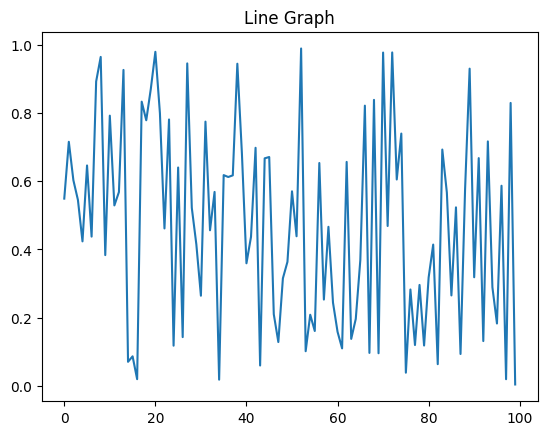

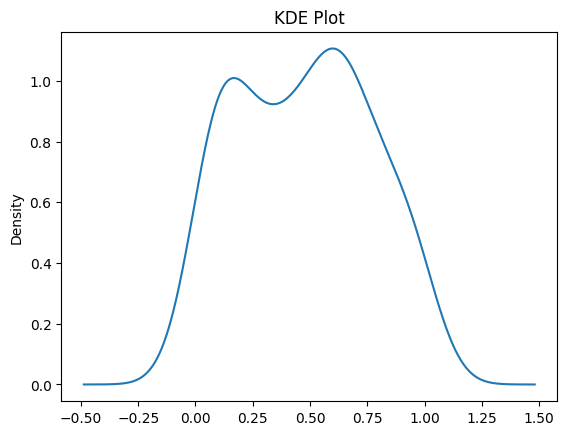

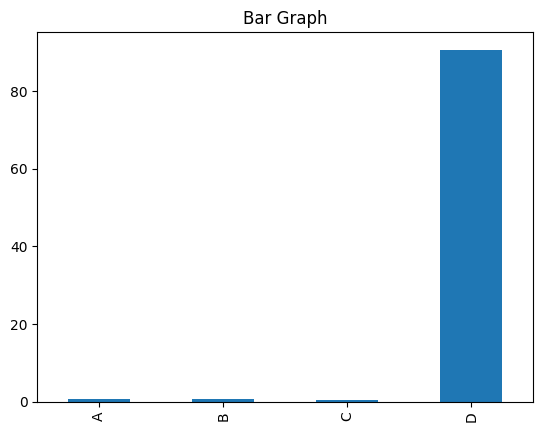

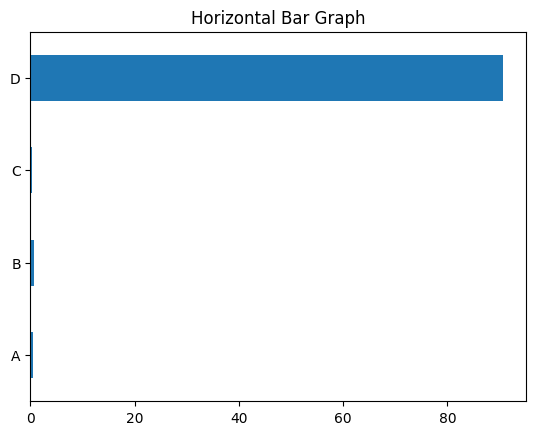

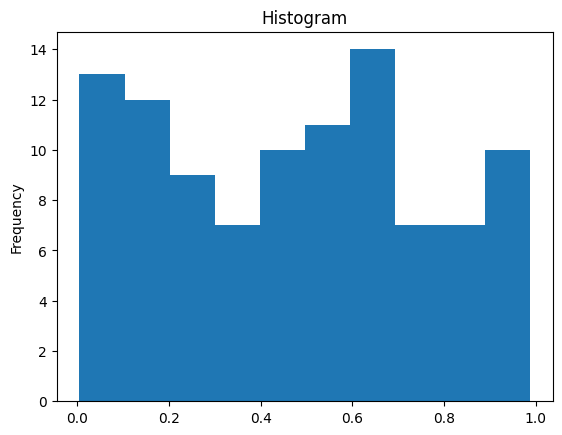

<Figure size 640x480 with 0 Axes>

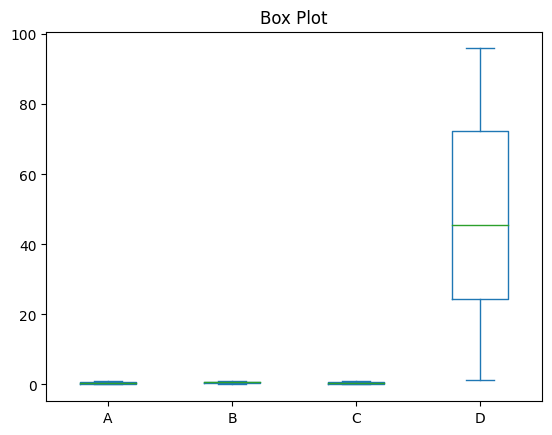

<Figure size 640x480 with 0 Axes>

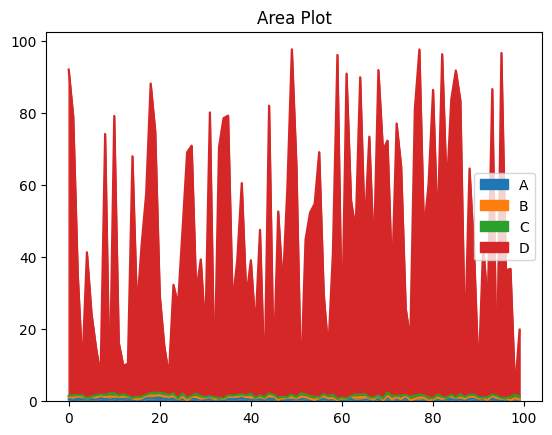

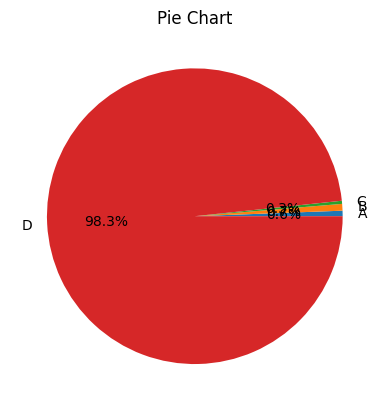

<Figure size 640x480 with 0 Axes>

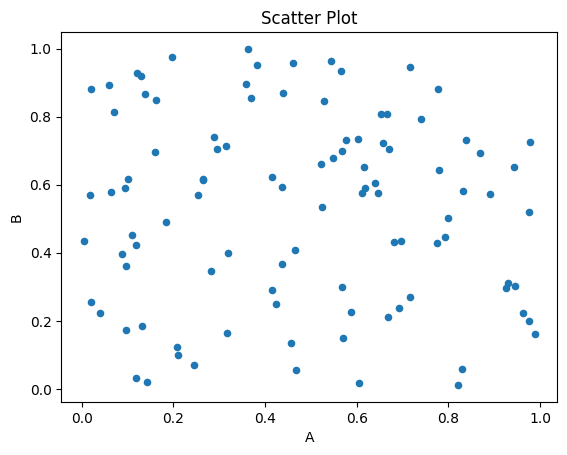

<Figure size 640x480 with 0 Axes>

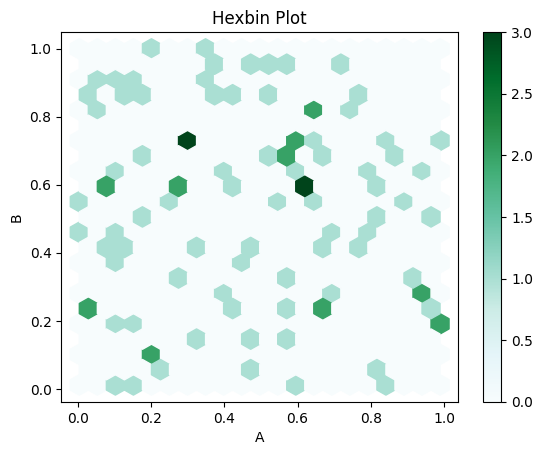

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 예제 데이터 생성
np.random.seed(0)
data = pd.DataFrame({
    'A': np.random.rand(100),
    'B': np.random.rand(100),
    'C': np.random.rand(100),
    'D': np.random.rand(100) * 100
})

# 선 그래프 (line)
plt.figure()
data['A'].plot.line(title='Line Graph')
plt.show()

# 커널 밀도 추정 그래프 (kde)
plt.figure()
data['A'].plot.kde(title='KDE Plot')
plt.show()

# 막대 그래프 (bar)
plt.figure()
data.iloc[0].plot.bar(title='Bar Graph')
plt.show()

# 수평 막대 그래프 (barh)
plt.figure()
data.iloc[0].plot.barh(title='Horizontal Bar Graph')
plt.show()

# 히스토그램 (hist)
plt.figure()
data['A'].plot.hist(title='Histogram', bins=10)
plt.show()

# 상자 그림 (box)
plt.figure()
data.plot.box(title='Box Plot')
plt.show()

# 영역 그래프 (area)
plt.figure()
data.plot.area(title='Area Plot')
plt.show()

# 원형 그래프 (pie)
plt.figure()
data.iloc[0].plot.pie(title='Pie Chart', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

# 산점도 (scatter)
plt.figure()
data.plot.scatter(x='A', y='B', title='Scatter Plot')
plt.show()

# Hexbin 그래프 (hexbin)
plt.figure()
data.plot.hexbin(x='A', y='B', gridsize=20, title='Hexbin Plot')
plt.show()

<hr>

# 수업문제 1
- 1.시리즈를 만들어보기(3가지 방법)
- 2.데이터 프레임 만들어  csv, excel, json 파일 변환해 보기

## 1. 시리즈 만들기

In [ ]:
# 리스트 인덱스 사용
import pandas as pd

# 리스트 생성
data_list = [100, 100, 90]

# 리스트에 인덱스 부여하여 시리즈 생성
student_series = pd.Series(data_list, index=['student01', 'student02', 'student03'])

student_series

student01    100
student02    100
student03     90
dtype: int64

In [ ]:
# 딕셔너리 사용
import pandas as pd

# 리스트 생성
data_dict = {
    'student01': 100
    ,'student02': 90
    ,'student03': 80
}

# 리스트에 인덱스 부여하여 시리즈 생성
student_series = pd.Series(data_dict)

student_series

student01    100
student02     90
student03     80
dtype: int64

In [ ]:
# 데이터와 인덱스 모두 사용
import pandas as pd

# 리스트 생성
data_list = [80, 100, 90]
index=['student01', 'student02', 'student03']

# 모두 사용하여 시리즈 생성
student_series = pd.Series(data_list, index=index)

student_series

student01     80
student02    100
student03     90
dtype: int64

## 2.데이터 프레임 만들어 csv, excel, json 파일 변환해 보기

In [ ]:
import pandas as pd

# 예시 데이터
data1 = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [23, 25, 24, 22],
    'Gender': ['Female', 'Male', 'Male', 'Male'],
    'Math': [90, 85, 78, 92],
    'English': [88, 79, 85, 90],
    'Science': [92, 80, 84, 88]
}

# 데이터 프레임 생성
df_students = pd.DataFrame(data1)

# 파일 생성
df_students.to_csv('students.csv', index=False)
df_students.to_json('students.json', orient='records', lines=True)
df_students.to_excel('students.xlsx', index=False)

# 수업문제 2

- 6가지 방법의 데이터 프레임을 만들어보기
(Json file 부르기 옵션 : orient='records', lines=True)

In [ ]:
# 시리즈를 연결하여 데이터프레임을 만드는 예시(concat())
import pandas as pd

# 시리즈 생성
series1 = pd.Series([10, 20, 30], name='Series1')
series2 = pd.Series([10, 20, 30], name='Series2')

# 시리즈를 데이터프레임으로 변환
df_series1 = series1.to_frame()
df_series2 = series2.to_frame()

# 데이터프레임을 병합
merged_df = pd.concat([df_series1, df_series2], axis=1)

merged_df

,Series1,Series2
0,10,10
1,20,20
2,30,30


In [ ]:
# 시리즈를 연결하여 데이터프레임을 만드는 예시(DataFrame())
import pandas as pd

# 시리즈 생성
series1 = pd.Series([10, 20, 30], name='Series1')
series2 = pd.Series([40, 50, 60], name='Series2')

# 시리즈를 데이터프레임으로 변환
df = pd.DataFrame()

# 시리즈를 데이터프레임에 병합
df['Series1'] = series1
df['Series2'] = series2

df

,Series1,Series2
0,10,40
1,20,50
2,30,60


In [ ]:
# 리스트 데이터로 데이터프레임을 만드는 예시
import pandas as pd

# 리스트 데이터 생성
data = [
    [1, 'Alice', 24],
    [2, 'Bob', 27],
    [3, 'Charlie', 22]
]

# 컬럼 이름 지정
columns = ['ID', 'Name', 'Age']

# 데이터프레임 생성
df = pd.DataFrame(data, columns=columns)

# 데이터프레임 출력
df


,ID,Name,Age
0,1,Alice,24
1,2,Bob,27
2,3,Charlie,22


In [ ]:
# 엑셀파일로 데이터프레임 만드는 예시
import pandas as pd

# 엑셀 파일 경로 지정
excel_file_path = "/content/students.xlsx"

# 엑셀 파일로부터 데이터프레임 생성
df_excel = pd.read_excel(excel_file_path)

# 생성된 데이터프레임 출력
df_excel

,Name,Age,Gender,Math,English,Science
0,Alice,23,Female,90,88,92
1,Bob,25,Male,85,79,80
2,Charlie,24,Male,78,85,84
3,David,22,Male,92,90,88


In [ ]:
# csv파일로 데이터프레임 만드는 예시
import pandas as pd

# 엑셀 파일 경로 지정
csv_file_path = "/content/students.csv"

# 엑셀 파일로부터 데이터프레임 생성
df_csv = pd.read_csv(csv_file_path)

# 생성된 데이터프레임 출력
df_csv

,Name,Age,Gender,Math,English,Science
0,Alice,23,Female,90,88,92
1,Bob,25,Male,85,79,80
2,Charlie,24,Male,78,85,84
3,David,22,Male,92,90,88


In [ ]:
# json파일로 데이터프레임 만드는 예시
import pandas as pd

# 엑셀 파일 경로 지정
json_file_path = "/content/students.json"

# 엑셀 파일로부터 데이터프레임 생성
df_json = pd.read_json(json_file_path, orient='records', lines=True)

# 생성된 데이터프레임 출력
df_json

,Name,Age,Gender,Math,English,Science
0,Alice,23,Female,90,88,92
1,Bob,25,Male,85,79,80
2,Charlie,24,Male,78,85,84
3,David,22,Male,92,90,88


In [ ]:
# 기타 조건 명령어로 데이터프레임을 만드는 예시
import pandas as pd

data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eva"],
    "Age": [23, 35, 45, 25, 30],
    "Score": [88, 92, 85, 90, 95]
}

df = pd.DataFrame(data)

# 열 선택
name_column = df["Name"]

# 행 선택
row = df.loc[0]

# 조건으로 필터링
filtered_df = df[df["Age"] > 25]

# 그룹화 및 집계
grouped_df = df.groupby("Age").mean(numeric_only=True)

# 정렬
sorted_df = df.sort_values(by="Age")

print("name_column:")
print(name_column)
print("\nrow:")
print(row)
print("\nfiltered_df:")
print(filtered_df)
print("\ngrouped_df:")
print(grouped_df)
print("\nsorted_df:")
print(sorted_df)

name_column:
0      Alice
1        Bob
2    Charlie
3      David
4        Eva
Name: Name, dtype: object

row:
Name     Alice
Age         23
Score       88
Name: 0, dtype: object

filtered_df:
      Name  Age  Score
1      Bob   35     92
2  Charlie   45     85
4      Eva   30     95

grouped_df:
     Score
Age       
23    88.0
25    90.0
30    95.0
35    92.0
45    85.0

sorted_df:
      Name  Age  Score
0    Alice   23     88
3    David   25     90
4      Eva   30     95
1      Bob   35     92
2  Charlie   45     85


# 수업문제 3

- 데이터 프레임을 생성하고 행과 열을 다양한 방법으로 조회하는 코드를 작성하여 공유해 주세요
  + 문제1: 'A'열에서 짝수인 값들만 선택하세요.
  + 문제 2: 'Age'가 25 이상인 사람들의 이름과 도시 선택하기
  + 문제 3: 3행부터 끝까지 모든 열 선택하기
  + 문제 4: 'ID'가 3 또는 5인 사람들의 이름과 나이 선택하기
  + 문제 5: 열 이름이 'B'와 'D'인 열 선택하기


In [ ]:
# 문제1: 'A'열에서 짝수인 값들만 선택하세요.
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [6, 7, 8, 9, 10],
    'C': [11, 12, 13, 14, 15],
    'D': [16, 17, 18, 19, 20]
}, index=['row1', 'row2', 'row3', 'row4', 'row5'])
print(df)
print('---------------')

print("\n방법 1: 조건을 이용하여 직접 선택")
print(df[df['A'] % 2 == 0]['A'])
print('---------------')

print("\n방법 2: loc를 이용하여 열 선택 후 조건 적용")
print(df.loc[df['A'] % 2 ==0, 'A'])
print('---------------')

print("\n방법 3: loc를 이용하여 조건 적용 후 열 선택")
print(df.loc[df.index[1:-1:2], df.columns[df.columns == 'A']])
print('---------------')

      A   B   C   D
row1  1   6  11  16
row2  2   7  12  17
row3  3   8  13  18
row4  4   9  14  19
row5  5  10  15  20
---------------

방법 1: 조건을 이용하여 직접 선택
row2    2
row4    4
Name: A, dtype: int64
---------------

방법 2: loc를 이용하여 열 선택 후 조건 적용
row2    2
row4    4
Name: A, dtype: int64
---------------

방법 3: loc를 이용하여 조건 적용 후 열 선택
      A
row2  2
row4  4
---------------


In [ ]:
# 문제 2: 'Age'가 25 이상인 사람들의 이름과 도시 선택하기
import pandas as pd

# 데이터프레임 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [24, 27, 22, 32, 29],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
}
df = pd.DataFrame(data)
print(df)
print('---------------')

print("\n방법 1: 조건을 이용하여 직접 선택")
print(df[df['Age'] >= 25][['Name', 'City']])
print('---------------')

print("\n방법 2: loc를 이용하여 조건 적용 후 열 선택")
print(df.loc[df['Age'] >= 25, ['Name', 'City']])
print('---------------')

      Name  Age         City
0    Alice   24     New York
1      Bob   27  Los Angeles
2  Charlie   22      Chicago
3    David   32      Houston
4      Eva   29      Phoenix
---------------

방법 1: 조건을 이용하여 직접 선택
    Name         City
1    Bob  Los Angeles
3  David      Houston
4    Eva      Phoenix
---------------

방법 2: loc를 이용하여 조건 적용 후 열 선택
    Name         City
1    Bob  Los Angeles
3  David      Houston
4    Eva      Phoenix
---------------


In [ ]:
# 문제 3: 3행부터 끝까지 모든 열 선택하기
import pandas as pd

# 데이터프레임 생성
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [6, 7, 8, 9, 10],
    'C': [11, 12, 13, 14, 15],
    'D': [16, 17, 18, 19, 20]
}
df = pd.DataFrame(data)
print(df)
print('---------------')

print("\n방법 1: iloc를 이용하여 위치 기반 선택")
print(df.iloc[2:])
print('---------------')

print("\n방법 2: loc를 이용하여 인덱스 기반 선택")
print(df.loc[df.index[2]:])
print('---------------')

   A   B   C   D
0  1   6  11  16
1  2   7  12  17
2  3   8  13  18
3  4   9  14  19
4  5  10  15  20
---------------

방법 1: iloc를 이용하여 위치 기반 선택
   A   B   C   D
2  3   8  13  18
3  4   9  14  19
4  5  10  15  20
---------------

방법 2: loc를 이용하여 인덱스 기반 선택
   A   B   C   D
2  3   8  13  18
3  4   9  14  19
4  5  10  15  20
---------------


In [ ]:
# 문제 4: 'ID'가 3 또는 5인 사람들의 이름과 나이 선택하기
import pandas as pd

# 데이터프레임 생성
data = {
    'ID': [1, 2, 3, 4, 5],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [24, 27, 22, 32, 29],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
}
df = pd.DataFrame(data)
print(df)
print('---------------')

print("\n방법 1: 조건을 이용하여 직접 선택")
print(df[(df['ID'] == 3) | (df['ID'] == 5)][['Name', 'Age']])
print('---------------')

print("\n방법 2: isin 메서드를 이용하여 선택")
print(df[df['ID'].isin([3, 5])][['Name', 'Age']])
print('---------------')

   ID     Name  Age         City
0   1    Alice   24     New York
1   2      Bob   27  Los Angeles
2   3  Charlie   22      Chicago
3   4    David   32      Houston
4   5      Eva   29      Phoenix
---------------

방법 1: 조건을 이용하여 직접 선택
      Name  Age
2  Charlie   22
4      Eva   29
---------------

방법 2: isin 메서드를 이용하여 선택
      Name  Age
2  Charlie   22
4      Eva   29
---------------


In [ ]:
# 문제 5: 열 이름이 'B'와 'D'인 열 선택하기
import pandas as pd

# 데이터프레임 생성
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [6, 7, 8, 9, 10],
    'C': [11, 12, 13, 14, 15],
    'D': [16, 17, 18, 19, 20]
}
df = pd.DataFrame(data)
print(df)
print('---------------')

print("\n방법 1: 조건을 이용하여 직접 선택")
print(df[['B', 'D']])
print('---------------')

print("\n방법 2: loc를 이용하여 열 선택")
print(df.loc[:, ['B', 'D']])
print('---------------')

   A   B   C   D
0  1   6  11  16
1  2   7  12  17
2  3   8  13  18
3  4   9  14  19
4  5  10  15  20
---------------

방법 1: 조건을 이용하여 직접 선택
    B   D
0   6  16
1   7  17
2   8  18
3   9  19
4  10  20
---------------

방법 2: loc를 이용하여 열 선택
    B   D
0   6  16
1   7  17
2   8  18
3   9  19
4  10  20
---------------


# 수업문제 4

- 데이터 프레임을 생성하고 학습한 내용(행과 열의 슬라이싱, 인덱싱)을 변형/응용하는 코드를 작성하여 공유해주세요




In [ ]:
import pandas as pd

# 예제 DataFrame 생성
data = {
    'StudentID': [1, 2, 3, 4, 5],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Grade': [10, 11, 10, 12, 11],
    'Math': [85, 90, 78, 92, 88],
    'English': [95, 80, 85, 87, 90],
    'Science': [88, 89, 92, 85, 90]
}

df = pd.DataFrame(data)

# 1. 인덱스 범위로 행 선택하기
print(df.iloc[0:3])
print('-------------------')
print(df.iloc[1:4])
print('-------------------')

# 2. 인덱스 범위로 열 선택하기
print(df.iloc[:, 0:2])
print('-------------------')
print(df.iloc[:, -2:])
print('-------------------')

# 3. iloc와 loc를 이용한 선택
print(df.iloc[0])
print('-------------------')
print(df.loc[df['StudentID'] == 2])
print('-------------------')

# 4. 과목별 평균 구하기
print(df[['Math', 'English', 'Science']].mean())
print('-------------------')

# 5. 같은 Grade 학생끼리 과목별 평균, 합산점수 구하기
print(df.groupby('Grade')[['Math', 'English', 'Science']].agg(['mean', 'sum']))

인덱스 범위로 행 선택하기:
   StudentID     Name  Grade  Math  English  Science
0          1    Alice     10    85       95       88
1          2      Bob     11    90       80       89
2          3  Charlie     10    78       85       92
-------------------
   StudentID     Name  Grade  Math  English  Science
1          2      Bob     11    90       80       89
2          3  Charlie     10    78       85       92
3          4    David     12    92       87       85
-------------------
인덱스 범위로 열 선택하기:
   StudentID     Name
0          1    Alice
1          2      Bob
2          3  Charlie
3          4    David
4          5      Eva
-------------------
   English  Science
0       95       88
1       80       89
2       85       92
3       87       85
4       90       90
-------------------
StudentID        1
Name         Alice
Grade           10
Math            85
English         95
Science         88
Name: 0, dtype: object
-------------------
   StudentID Name  Grade  Math  English  Science
1     

# 수업문제 5

- 결측치 처리에 대한 간단한 변형/응용 예시를 공유하세요

,PatientID,Age,Weight,Height,BloodPressure,Age_filled_mean,Weight_filled_median,Height_filled_interpolate
0,1,35.0,70.5,165.0,120.0,35.00,70.50,165.0
1,2,42.0,65.3,NaN,130.0,42.00,65.30,170.0
2,3,28.0,NaN,175.0,115.0,28.00,72.95,175.0
3,4,52.0,80.0,180.0,NaN,52.00,80.00,180.0
4,5,45.0,68.2,170.0,125.0,45.00,68.20,170.0
5,6,38.0,72.0,170.0,128.0,38.00,72.00,170.0
6,7,40.0,68.5,172.0,122.0,40.00,68.50,172.0
7,8,29.0,76.2,176.0,118.0,29.00,76.20,176.0
8,9,55.0,74.8,NaN,NaN,55.00,74.80,178.0
9,10,48.0,69.1,180.0,130.0,48.00,69.10,180.0


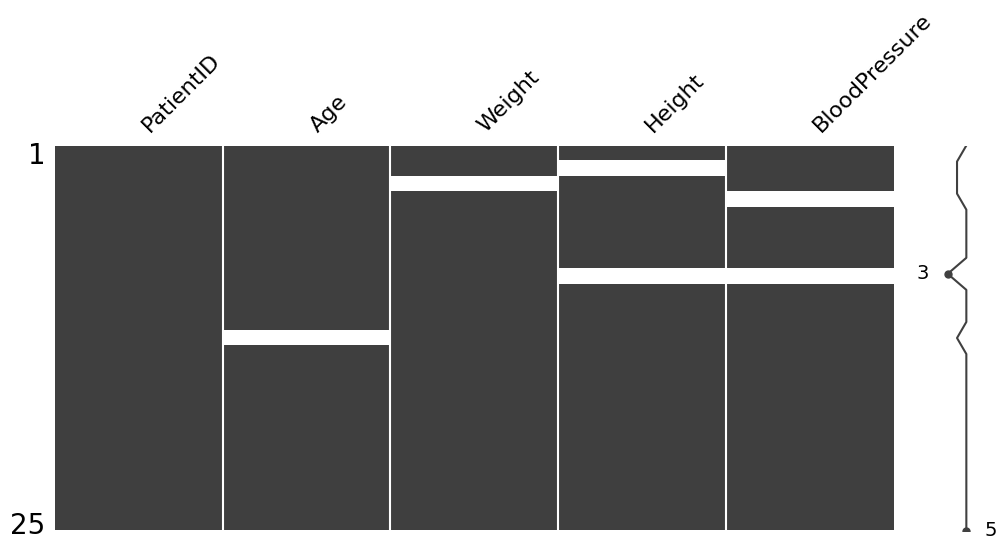

In [ ]:
import pandas as pd
import numpy as np

# 기존 데이터프레임
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                  16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
    'Age': [35, 42, 28, 52, 45, 38, 40, 29, 55, 48, 33, 37, np.nan, 50, 31,
            36, 39, 47, 53, 56, 41, 46, 54, 30, 49],
    'Weight': [70.5, 65.3, np.nan, 80.0, 68.2, 72.0, 68.5, 76.2, 74.8, 69.1, 71.5, 65.7, 79.3, 73.6, 70.4,
               77.0, 68.9, 75.1, 72.3, 78.5, 74.2, 76.9, 80.4, 67.8, 81.5],
    'Height': [165, np.nan, 175, 180, 170, 170, 172, 176, np.nan, 180, 182, 165, 178, 185, 167,
               172, 174, 179, 171, 183, 166, 177, 181, 169, 184],
    'BloodPressure': [120, 130, 115, np.nan, 125, 128, 122, 118, np.nan, 130, 132, 125, 138, 140, 115,
                      127, 133, 126, 137, 131, 123, 136, 129, 121, 134]
}

# 데이터프레임 생성
df_patient = pd.DataFrame(data)
df_patient

# 결측값 확인
df_patient.isna().sum()
# 결측값 시각화
import missingno as msno
msno.matrix(df_patient, figsize=(12, 5))

# BloodPressure 결측값 삭제
df_dropna_BloodPressure = df_patient.dropna(subset=['BloodPressure'])
df_dropna_BloodPressure

# Age 평균값(mean) Age
mean_age = df_patient['Age'].mean()
df_patient['Age_filled_mean'] = df_patient['Age'].fillna(mean_age)
df_patient

# Weight 중앙값(median) 대체
median_weight = df_patient['Weight'].median()
df_patient['Weight_filled_median'] = df_patient['Weight'].fillna(median_weight)
df_patient

# Height 보간법(interpolation)
df_patient['Height_filled_interpolate'] = df_patient['Height'].interpolate(method='linear')
df_patient
